In [1]:
# download helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import helper_functions as helper
import tensorflow as tf

# Get 10% of training data of 10 classes of food 101

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
helper.unzip_data('./10_food_classes_10_percent.zip')

FileNotFoundError: [Errno 2] No such file or directory: './10_food_classes_10_percent.zip'

In [ ]:
!rm 10_food_classes_10_percent.zip

In [ ]:
helper.walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_path = '10_food_classes_10_percent/train'
test_path = '10_food_classes_10_percent/test'

In [4]:
IMG_SHAPE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_path, label_mode='categorical', batch_size=BATCH_SIZE, image_size=IMG_SHAPE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_path,label_mode='categorical', batch_size=BATCH_SIZE, image_size=IMG_SHAPE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
for imgs,labels in train_data_10_percent.take(1):
    print(imgs,labels)

tf.Tensor(
[[[[2.35153065e+01 1.35153065e+01 1.25153065e+01]
   [2.98571434e+01 1.98571434e+01 1.88571434e+01]
   [3.63418350e+01 2.63418369e+01 2.53418369e+01]
   ...
   [8.48212433e+01 5.13927155e+01 3.17499237e+01]
   [7.73060379e+01 4.55203590e+01 3.04489174e+01]
   [6.68418121e+01 3.88418121e+01 2.48418140e+01]]

  [[2.17091827e+01 1.17091837e+01 1.07091837e+01]
   [2.11377544e+01 1.11377544e+01 1.01377544e+01]
   [3.42397957e+01 2.42397976e+01 2.32397976e+01]
   ...
   [7.42040329e+01 4.07755051e+01 2.15306320e+01]
   [7.66326904e+01 4.57092514e+01 2.80511093e+01]
   [8.68573227e+01 5.88573227e+01 4.48573227e+01]]

  [[2.54285717e+01 1.54285717e+01 1.44285717e+01]
   [2.14132652e+01 1.14132652e+01 1.04132652e+01]
   [2.53367348e+01 1.53367357e+01 1.43367348e+01]
   ...
   [9.58163223e+01 6.08163223e+01 4.16020584e+01]
   [8.70611572e+01 5.62040405e+01 3.82040405e+01]
   [7.44335098e+01 4.74335060e+01 3.00049343e+01]]

  ...

  [[2.11918320e+02 1.49132584e+02 7.25611115e+01]
   [2

In [9]:
# normonalize our data

# Building a transfer learning model using functional API

In [10]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [11]:
base_model = EfficientNetB0(
    include_top=False,
)

# Freeze the base model
base_model.trainable = False

# create input in our model 
inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")

# If u are using RestNet50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass the input in base model
x = base_model(inputs)
print(f"{x.shape}")

# average pool of the base model
x = tf.keras.layers.GlobalAvgPool2D(name="global_avg_pooling_layer")(x)
print(f"shape after glob avg 2d{x.shape}")

# create output layer
outputs = tf.keras.layers.Dense(10,activation='softmax', name="output_layer")(x)

#create a model_0
model_0 = tf.keras.Model(inputs,outputs)

# compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_0_hist = model_0.fit(train_data_10_percent, 
    epochs=5, 
    steps_per_epoch=len(train_data_10_percent), 
    validation_data=(test_data_10_percent), 
    validation_steps=int((0.25*len(test_data_10_percent))),
    callbacks=[helper.create_tensorboard_callback('tranferlearning','10_percent_feature_extraction')]
)

(None, 7, 7, 1280)
shape after glob avg 2d(None, 1280)
Saving TensorBoard log files to: tranferlearning/10_percent_feature_extraction/20220723-203616
Epoch 1/5
24/24 [==============================] - 12s 167ms/step - loss: 1.9957 - accuracy: 0.3587 - val_loss: 1.3920 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - 3s 110ms/step - loss: 1.1444 - accuracy: 0.7653 - val_loss: 0.8709 - val_accuracy: 0.8372
Epoch 3/5
24/24 [==============================] - 3s 106ms/step - loss: 0.8124 - accuracy: 0.8453 - val_loss: 0.6881 - val_accuracy: 0.8766
Epoch 4/5
24/24 [==============================] - 3s 105ms/step - loss: 0.6465 - accuracy: 0.8600 - val_loss: 0.5848 - val_accuracy: 0.8832
Epoch 5/5
24/24 [==============================] - 3s 105ms/step - loss: 0.5561 - accuracy: 0.8813 - val_loss: 0.5775 - val_accuracy: 0.8701


In [12]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 5s 57ms/step - loss: 0.5634 - accuracy: 0.8660


[0.563449501991272, 0.8659999966621399]

In [13]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

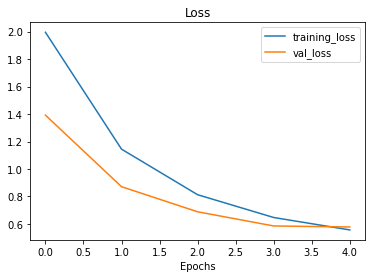

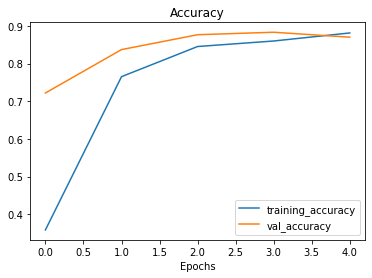

In [16]:
helper.plot_loss_curves(model_0_hist)

# Getting a feature vector from a trained model

In [17]:
input_shape = (1,4,4,3)
random_tensor = tf.random.normal(input_shape)
random_tensor.shape

TensorShape([1, 4, 4, 3])

In [18]:
global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(random_tensor)
print(global_avg_pooled_tensor)

print("shape of global avg ",global_avg_pooled_tensor.shape)

tf.Tensor([[-0.02658603  0.08692892 -0.36124057]], shape=(1, 3), dtype=float32)
shape of global avg  (1, 3)


In [19]:
tf.reduce_mean(random_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.02658603,  0.08692892, -0.36124057]], dtype=float32)>

In [20]:
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(random_tensor)
print(global_max_pooled_tensor)
print("shape of global max pool",global_max_pooled_tensor.shape)


tf.Tensor([[2.1426163 2.130905  1.6803479]], shape=(1, 3), dtype=float32)
shape of global max pool (1, 3)


In [21]:
tf.reduce_max(random_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[2.1426163, 2.130905 , 1.6803479]], dtype=float32)>

# Running a series of transfer learning experiments
We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data... how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation 
2. `model_2` - use feature extraction transfer learning with 10% of the training with data augmentaton 
3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation 

> 🔑 **Note:** throughout all experiments the same test dataset will be used to evaluate our model... this ensures consistency across evaluation metrics.

## Model_1

In [19]:
helper.unzip_data('10_food_classes_1_percent.zip')

In [ ]:
# Downloa and unzip and delete the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
helper.unzip_data('10_food_classes_1_percent.zip')
!rm 10_food_classes_1_percent.zip

--2022-07-21 23:15:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.27.48, 172.217.27.16, 142.250.66.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.27.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  55.5MB/s    in 2.3s    

2022-07-21 23:15:26 (55.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
train_path_one_p = './10_food_classes_1_percent/train'
test_path_one_p = './10_food_classes_1_percent/test'

In [23]:
helper.walk_through_dir(dir_path=train_path_one_p)

There are 10 directories and 0 images in './10_food_classes_1_percent/train'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\chicken_curry'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\chicken_wings'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\fried_rice'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\grilled_salmon'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\hamburger'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\ice_cream'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\pizza'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\ramen'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\steak'.
There are 0 directories and 7 images in './10_food_classes_1_percent/train\sushi'.


In [24]:
# setup data loaders
IMG_SHAPE = (224,224)
train_data_1_p = tf.keras.preprocessing.image_dataset_from_directory(train_path_one_p,batch_size=32, image_size=IMG_SHAPE,label_mode='categorical')
test_data_1_p = tf.keras.preprocessing.image_dataset_from_directory(test_path_one_p,batch_size=32, image_size=IMG_SHAPE,label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## NEW Feature of data preprocessing

In [25]:
# data augmentation stage
from tensorflow.keras.layers.experimental import preprocessing
with tf.device("CPU:0"):
    data_aug = tf.keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        preprocessing.RandomRotation(.2),
        preprocessing.RandomZoom(.2),
        preprocessing.RandomHeight(.2),
        preprocessing.RandomWidth(.2),
        # preprocessing.Rescale(1/255.) for restnet v225
    ], name="data_aug")


In [26]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualize our data augmentation

<tf.Tensor: shape=(425, 518, 3), dtype=float32, numpy=
array([[[220.9535  , 253.26999 , 248.16447 ],
        [221.77275 , 253.2739  , 248.27206 ],
        [222.63467 , 253.64877 , 248.64877 ],
        ...,
        [152.93115 , 141.93054 , 122.70451 ],
        [153.1827  , 142.16629 , 123.37528 ],
        [153.45694 , 142.40228 , 123.82712 ]],

       [[220.61694 , 253.25635 , 248.04321 ],
        [221.30869 , 253.05107 , 248.04738 ],
        [222.45586 , 253.4769  , 248.4769  ],
        ...,
        [152.53595 , 141.5769  , 120.6032  ],
        [152.5292  , 141.52684 , 121.35955 ],
        [152.8316  , 141.82368 , 121.77033 ]],

       [[220.44278 , 253.4823  , 248.13582 ],
        [221.0788  , 253.045   , 248.0327  ],
        [222.62059 , 253.73647 , 248.73628 ],
        ...,
        [151.33055 , 140.99721 , 117.248604],
        [149.78247 , 139.0834  , 116.683235],
        [150.74841 , 140.05583 , 117.70063 ]],

       ...,

       [[245.64174 , 255.      , 251.86336 ],
        [245.

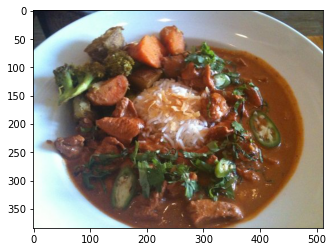

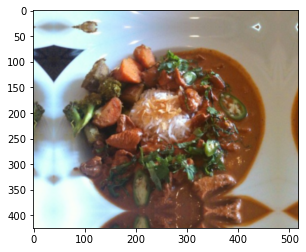

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_tensor = mpimg.imread('./10_food_classes_1_percent/test/chicken_curry/101833.jpg')
plt.imshow(img_tensor)
auged_img = data_aug(img_tensor,training=True)
plt.figure()
plt.imshow(auged_img/255)
auged_img


In [28]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")
x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAvgPool2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_1_hist = model_1.fit(
    train_data_1_p,
    steps_per_epoch=len(train_data_1_p),
    validation_data=test_data_1_p,
    validation_steps=(.25*len(test_data_1_p)),
    epochs=5
)

Epoch 1/5
3/3 [==============================] - 8s 1s/step - loss: 2.3104 - accuracy: 0.0857 - val_loss: 2.2773 - val_accuracy: 0.1500
Epoch 2/5
3/3 [==============================] - 2s 812ms/step - loss: 2.0860 - accuracy: 0.2571 - val_loss: 2.1325 - val_accuracy: 0.2359
Epoch 3/5
3/3 [==============================] - 2s 847ms/step - loss: 1.9327 - accuracy: 0.4429 - val_loss: 2.0270 - val_accuracy: 0.3031
Epoch 4/5
3/3 [==============================] - 2s 850ms/step - loss: 1.7086 - accuracy: 0.6000 - val_loss: 1.9362 - val_accuracy: 0.3656
Epoch 5/5
3/3 [==============================] - 2s 887ms/step - loss: 1.5999 - accuracy: 0.6429 - val_loss: 1.8388 - val_accuracy: 0.4359


In [29]:
model_1.evaluate(test_data_1_p)

79/79 [==============================] - 4s 53ms/step - loss: 1.8292 - accuracy: 0.4496


[1.8292428255081177, 0.4496000111103058]

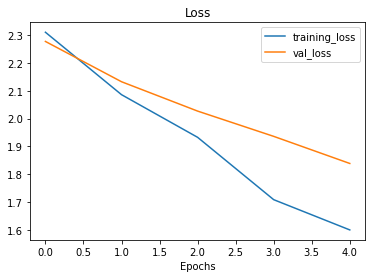

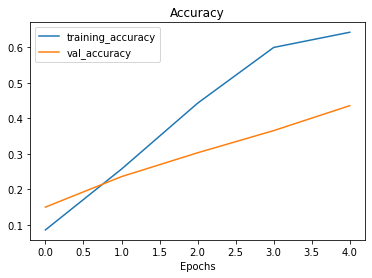

In [30]:
helper.plot_loss_curves(model_1_hist)

## Model 2

In [31]:
from tensorflow.keras.layers.experimental import preprocessing 
with tf.device("CPU:0"):
    data_aug = tf.keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        preprocessing.RandomRotation(.2),
        preprocessing.RandomZoom(.2),
        preprocessing.RandomHeight(.2),
        preprocessing.RandomWidth(.2),
        # preprocessing.Rescale(1/255.) for restnet v225
    ], name="data_aug")

In [32]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name="input_layer")
x = data_aug(inputs)# augment our training images (augmentation doesn't occur on test data)
x = base_model(x,training=False) # pass augmented images to base model but keep it in inference mode, 
# this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model


x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name='output_layer')(x)


model_2 = tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_2_hist = model_2.fit(
    train_data_10_percent,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=(.25*len(test_data_10_percent)),
    epochs=5
)

Epoch 1/5
24/24 [==============================] - 14s 428ms/step - loss: 1.9962 - accuracy: 0.3400 - val_loss: 1.4470 - val_accuracy: 0.6859
Epoch 2/5
24/24 [==============================] - 7s 289ms/step - loss: 1.3057 - accuracy: 0.7173 - val_loss: 0.9921 - val_accuracy: 0.8078
Epoch 3/5
24/24 [==============================] - 7s 289ms/step - loss: 1.0115 - accuracy: 0.7387 - val_loss: 0.7682 - val_accuracy: 0.8391
Epoch 4/5
24/24 [==============================] - 6s 249ms/step - loss: 0.8285 - accuracy: 0.7960 - val_loss: 0.6587 - val_accuracy: 0.8594
Epoch 5/5
24/24 [==============================] - 7s 266ms/step - loss: 0.7386 - accuracy: 0.8213 - val_loss: 0.6088 - val_accuracy: 0.8656


In [33]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 4s 53ms/step - loss: 0.6229 - accuracy: 0.8476


[0.6229124665260315, 0.847599983215332]

In [34]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aug (Sequential)       (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

## Create a model check point

In [35]:
check_point_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

In [36]:
# Create a model check point that saves the weights
check_point_cb = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,save_weights_only=True,save_best_only=False,save_freq='epoch',verbose=1)

In [37]:
model_2_hist = model_2.fit(
    train_data_10_percent,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=(.25*len(test_data_10_percent)),
    epochs=5,
    callbacks=[check_point_cb]
)

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.8440
Epoch 1: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 292ms/step - loss: 0.6585 - accuracy: 0.8440 - val_loss: 0.5436 - val_accuracy: 0.8719
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.8413
Epoch 2: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 291ms/step - loss: 0.6046 - accuracy: 0.8413 - val_loss: 0.5575 - val_accuracy: 0.8641
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.8613
Epoch 3: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 6s 266ms/step - loss: 0.5622 - accuracy: 0.8613 - val_loss: 0.4994 - val_accuracy: 0.8656
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.874

In [38]:
result_10_percent_data_aug = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 4s 52ms/step - loss: 0.4943 - accuracy: 0.8648


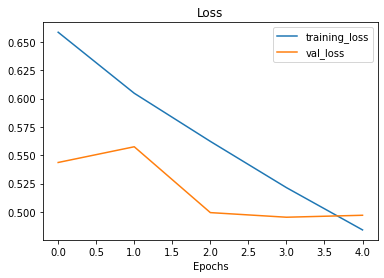

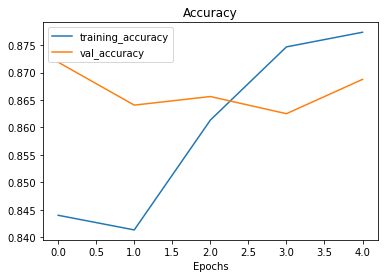

In [39]:
helper.plot_loss_curves(model_2_hist)

### Loading in checkpoint weights

In [40]:
model_2.load_weights(filepath=check_point_path)

In [41]:
loaded_weight_model_res = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 4s 53ms/step - loss: 0.4943 - accuracy: 0.8648


In [42]:
# If result from our loaded weights matched the result_10_percent_data_aug the we work
loaded_weight_model_res == result_10_percent_data_aug
loaded_weight_model_res

[0.49434134364128113, 0.864799976348877]

In [43]:
result_10_percent_data_aug

[0.49434131383895874, 0.864799976348877]

In [44]:
# the pc is using precision store therefore it will show false 

In [45]:
import numpy as np
np.isclose(result_10_percent_data_aug,loaded_weight_model_res)

array([ True,  True])

# Model 3 Fine tuning an existing model on 10% of data

In [46]:
# layers in loaded model
model_2.layers

In [47]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000025C3E908B80> True
<keras.engine.sequential.Sequential object at 0x0000025C3E8C5310> True
<keras.engine.functional.Functional object at 0x0000025C43C10700> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x0000025C43BEB700> True
<keras.layers.core.dense.Dense object at 0x0000025C43BA4520> True


In [48]:
# EffictionNet B0
for i, layer in enumerate(model_2.layers[2].layers):
    print(i,layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x0000025C3E91BA90> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x0000025C3E91BBB0> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x0000025BF4A944C0> False
3 <keras.layers.core.tf_op_layer.TFOpLambda object at 0x0000025C3E908DC0> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025BF4ACB430> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x0000025C3E92EF70> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E9389D0> False
7 <keras.layers.core.activation.Activation object at 0x0000025C3E92E3D0> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000025C3E93ED90> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E943FA0> False
10 <keras.layers.core.activation.Activation object at 0x0000025C3E943BE0> False
11 <keras.layers

In [49]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

## Model 3: Fine-tuning an existing model on 10% of the data

> 🔑 **Note:** Fine-tuning usually works best *after* training a feature extraction model for a few epochs with large amounts of custom data.

In [50]:
# unfreeze the last ten layers of EfficentNet B0
base_model.trainable = True

# freeze all layers except the last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the entire model
# when fine turning  lower learning rate by 10x
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


c:\Users\calvin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> 🔑 **Note:** When using fine-tuning it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is at least 10x (though different sources will claim other values). A good resource for information on this is the ULMFiT paper: https://arxiv.org/abs/1801.06146 

In [51]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000025C3E91BA90> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x0000025C3E91BBB0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x0000025BF4A944C0> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x0000025C3E908DC0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025BF4ACB430> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000025C3E92EF70> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E9389D0> False
<keras.layers.core.activation.Activation object at 0x0000025C3E92E3D0> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000025C3E93ED90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E943FA0> False
<keras.layers.core.activation.Activation object at 0x0000025C3E943BE0> False
<keras.layers.pooling.global_average_po

In [52]:
len(model_2.trainable_variables)

12

In [53]:
fine_tune_epochs = 5 +5

model_2.load_weights(filepath=check_point_path)
hist_fine_10_percent = model_2.fit(
                    train_data_10_percent,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data_10_percent,
                    validation_steps=int((len(test_data_10_percent) * .25)),
                    epochs=fine_tune_epochs,
                    initial_epoch= model_2_hist.epoch[-1], # start training for the last epochs,
                    callbacks=[helper.create_tensorboard_callback(
                        'tranferlearning',
                        "10_percent_fine_tuning"
                    )]
                )

Saving TensorBoard log files to: tranferlearning/10_percent_fine_tuning/20220723-203839
Epoch 5/10
24/24 [==============================] - 14s 351ms/step - loss: 0.7658 - accuracy: 0.7560 - val_loss: 0.5861 - val_accuracy: 0.7961
Epoch 6/10
24/24 [==============================] - 6s 264ms/step - loss: 0.3017 - accuracy: 0.8960 - val_loss: 0.6669 - val_accuracy: 0.8191
Epoch 7/10
24/24 [==============================] - 6s 247ms/step - loss: 0.2046 - accuracy: 0.9347 - val_loss: 0.5565 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 6s 254ms/step - loss: 0.1025 - accuracy: 0.9707 - val_loss: 0.5451 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 6s 255ms/step - loss: 0.0692 - accuracy: 0.9760 - val_loss: 0.5329 - val_accuracy: 0.8438
Epoch 10/10
24/24 [==============================] - 6s 229ms/step - loss: 0.0662 - accuracy: 0.9773 - val_loss: 0.5801 - val_accuracy: 0.8618


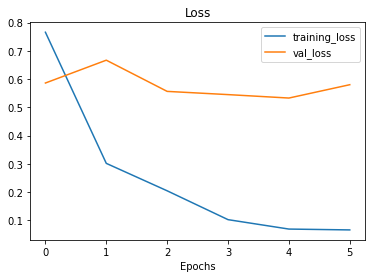

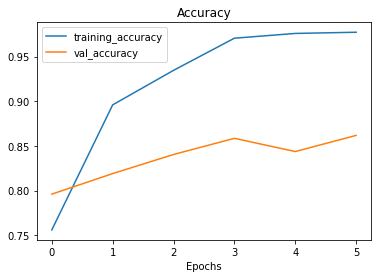

In [54]:
import helper_functions as helper
helper.plot_loss_curves(hist_fine_10_percent)

In [55]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 4s 54ms/step - loss: 0.5855 - accuracy: 0.8412


[0.5854798555374146, 0.8411999940872192]

In [56]:
res_fine_tune_10 = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 4s 54ms/step - loss: 0.5855 - accuracy: 0.8412


In [57]:
result_10_percent_data_aug

[0.49434131383895874, 0.864799976348877]

# Model 4 Fine Turning

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

In [58]:
helper.unzip_data('./10_food_classes_all_data.zip')

In [60]:
train_dir_all_data = "./10_food_classes_all_data/train/"
test_dir_all_data = "./10_food_classes_all_data/test/"

In [63]:
helper.walk_through_dir(train_dir_all_data)

There are 10 directories and 0 images in './10_food_classes_all_data/test/'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in './10_food_classes_all_data/test/sushi'.


In [87]:
import tensorflow as tf
IMG_SHAPE = (224,224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,batch_size=32,image_size=IMG_SHAPE,label_mode='categorical')
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all_data,batch_size=32,image_size=IMG_SHAPE,label_mode='categorical')

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# load weight from check point

In [88]:
model_2.load_weights(check_point_path)

In [89]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 6s 54ms/step - loss: 0.4943 - accuracy: 0.8648


[0.49434134364128113, 0.864799976348877]

In [90]:
result_10_percent_data_aug

[0.49434131383895874, 0.864799976348877]

In [91]:
for layer_number, layer  in enumerate(model_2.layers[2].layers):
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000025C3E91BA90> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x0000025C3E91BBB0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x0000025BF4A944C0> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x0000025C3E908DC0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025BF4ACB430> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x0000025C3E92EF70> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E9389D0> False
<keras.layers.core.activation.Activation object at 0x0000025C3E92E3D0> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000025C3E93ED90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025C3E943FA0> False
<keras.layers.core.activation.Activation object at 0x0000025C3E943BE0> False
<keras.layers.pooling.global_average_po

In [98]:
model_2_hist.epoch[-1]

4

In [100]:
fine_tune_epochs = 5 +5
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])
model_4_hist = model_2.fit(
    train_data_all,
    epochs=fine_tune_epochs,
    steps_per_epoch=len(train_data_all), 
    validation_data=test_data_all,
    validation_steps=(len(test_data_all) *.25),
    initial_epoch=model_2_hist.epoch[-1],
    callbacks=[helper.create_tensorboard_callback("tranferlearning","full_class_fine_tuning")]
)

Saving TensorBoard log files to: tranferlearning/full_class_fine_tuning/20220723-211720
Epoch 5/10
235/235 [==============================] - 44s 164ms/step - loss: 0.2232 - accuracy: 0.9276 - val_loss: 0.2466 - val_accuracy: 0.9219
Epoch 6/10
235/235 [==============================] - 35s 149ms/step - loss: 0.2128 - accuracy: 0.9324 - val_loss: 0.2560 - val_accuracy: 0.9219
Epoch 7/10
235/235 [==============================] - 35s 148ms/step - loss: 0.2008 - accuracy: 0.9356 - val_loss: 0.2431 - val_accuracy: 0.9250
Epoch 8/10
235/235 [==============================] - 35s 149ms/step - loss: 0.1973 - accuracy: 0.9380 - val_loss: 0.2358 - val_accuracy: 0.9266
Epoch 9/10
235/235 [==============================] - 58s 248ms/step - loss: 0.1911 - accuracy: 0.9383 - val_loss: 0.2467 - val_accuracy: 0.9219
Epoch 10/10
235/235 [==============================] - 132s 560ms/step - loss: 0.1843 - accuracy: 0.9431 - val_loss: 0.2508 - val_accuracy: 0.9250


In [101]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

6
12
[0.7559999823570251, 0.8960000276565552, 0.9346666932106018, 0.9706666469573975, 0.9760000109672546, 0.9773333072662354, 0.9276000261306763, 0.9323999881744385, 0.9355999827384949, 0.9380000233650208, 0.9382666945457458, 0.9430666565895081]


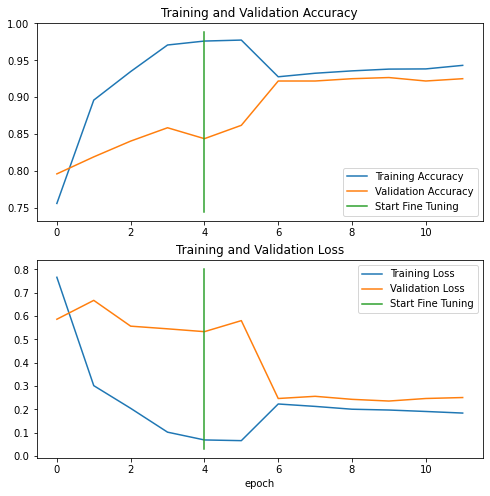

In [102]:
compare_historys(hist_fine_10_percent,model_4_hist)

In [ ]:
import tensorboard